This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label Anterior limb of internal capsule R: 8.70495948761e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 8.53956776796e-05
Region: Anterior limb of internal capsule R
0.656368525644
0.190919807486
0.24113240694
Standard deviation of label Anterior limb of internal capsule L: 8.7246083737e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 8.57715841465e-05
Region: Anterior limb of internal capsule L
0.609961321229
0.406361056611
0.70195709672
Standard deviation of label Posterior limb of internal capsule R: 6.8085489729e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 6.63593159434e-05
Region: Posterior limb of internal capsule R
0.679057054375
0.959070684632
0.574286946551
Standard deviation of label Posterior limb of internal capsule L: 6.15937589163e-05
Mod

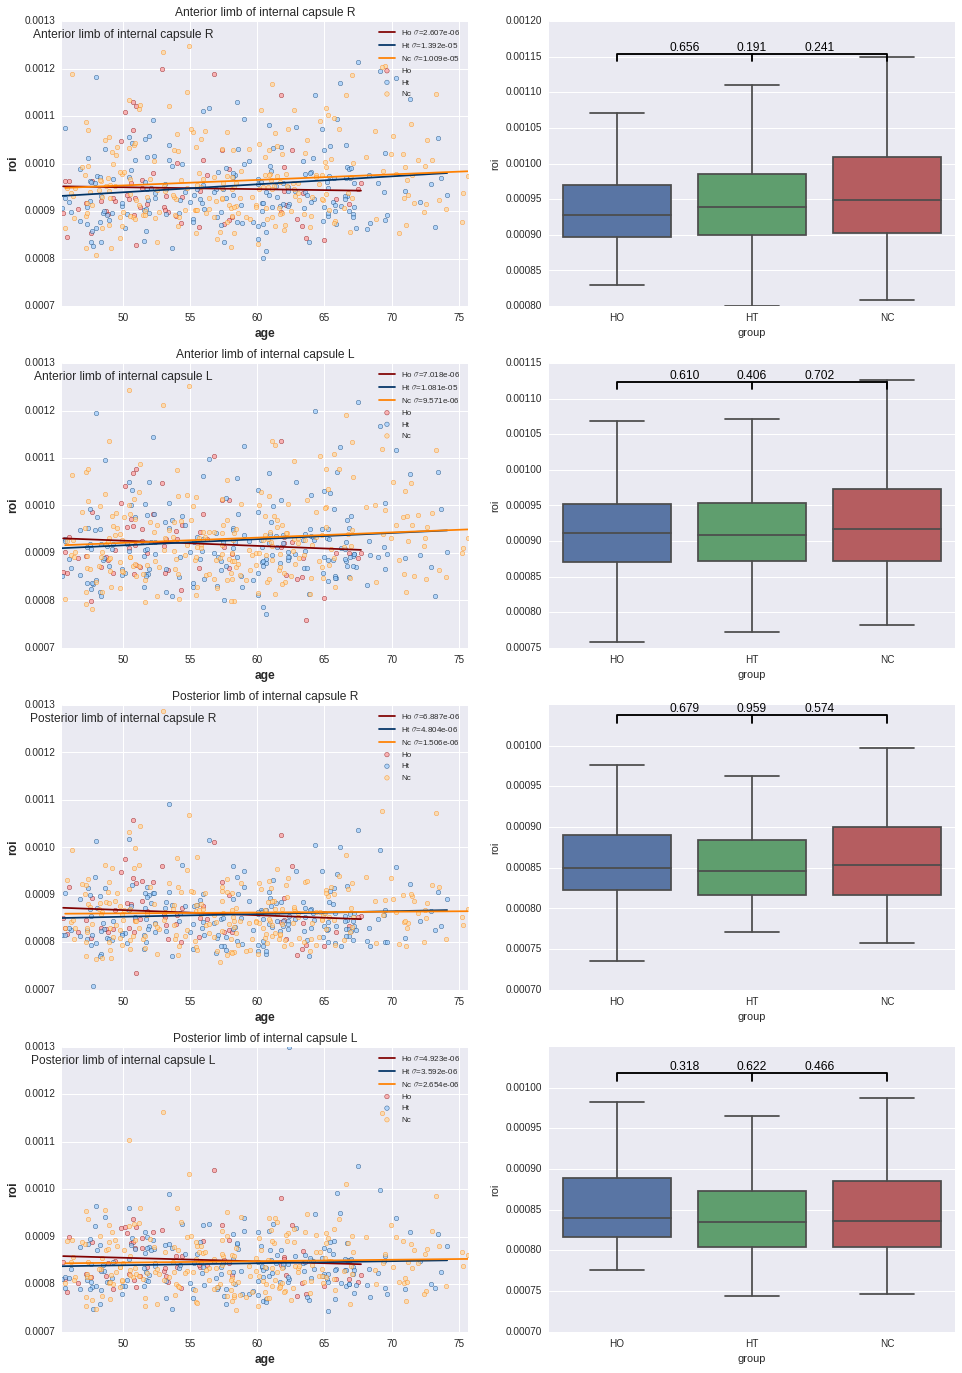

In [2]:
regions = range(17,21 )
#for x in [9]: #,10,11,12,13]:
#    regions.remove(x)
names = {0: 'Unclassified',
 1: 'Middle cerebellar peduncle',
 2: 'Pontine crossing tract (a part of MCP)',
 3: 'Genu of corpus callosum',
 4: 'Body of corpus callosum',
 5: 'Splenium of corpus callosum',
 6: 'Fornix (column and body of fornix)',
 7: 'Corticospinal tract R',
 8: 'Corticospinal tract L',
 9: 'Medial lemniscus R',
 10: 'Medial lemniscus L',
 11: 'Inferior cerebellar peduncle R  ',
 12: 'Inferior cerebellar peduncle L',
 13: 'Superior cerebellar peduncle R',
 14: 'Superior cerebellar peduncle L',
 15: 'Cerebral peduncle R',
 16: 'Cerebral peduncle L',
 17: 'Anterior limb of internal capsule R',
 18: 'Anterior limb of internal capsule L',
 19: 'Posterior limb of internal capsule R',
 20: 'Posterior limb of internal capsule L',
 21: 'Retrolenticular part of internal capsule R',
 22: 'Retrolenticular part of internal capsule L',
 23: 'Anterior corona radiata R',
 24: 'Anterior corona radiata L',
 25: 'Superior corona radiata R',
 26: 'Superior corona radiata L',
 27: 'Posterior corona radiata R',
 28: 'Posterior corona radiata L',
 29: 'Posterior thalamic radiation (include optic radiation) R',
 30: 'Posterior thalamic radiation (include optic radiation) L',
 31: 'Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) R',
 32: 'Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) L',
 33: 'External capsule R',
 34: 'External capsule L',
 35: 'Cingulum (cingulate gyrus) R',
 36: 'Cingulum (cingulate gyrus) L',
 37: 'Cingulum (hippocampus) R',
 38: 'Cingulum (hippocampus) L',
 39: 'Fornix (cres) / Stria terminalis (can not be resolved with current resolution) R',
 40: 'Fornix (cres) / Stria terminalis (can not be resolved with current resolution) L',
 41: 'Superior longitudinal fasciculus R',
 42: 'Superior longitudinal fasciculus L',
 43: 'Superior fronto-occipital fasciculus (could be a part of anterior internal capsule) R',
 44: 'Superior fronto-occipital fasciculus (could be a part of anterior internal capsule) L',
 45: 'Uncinate fasciculus R',
 46: 'Uncinate fasciculus L',
 47: 'Tapetum R',
 48: 'Tapetum L'}


data = pd.read_excel('/home/grg/spm/data/covariates.xls')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/tmp/roivalues_labels_skel_DARTEL_MD/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

to_remove = [10551, 10397, 11383, 13083, 10701, 21092] # failed DARTEL subjects

# remove wrong subjects
data = data[~data['subject'].isin(to_remove)]
for e in to_remove:
    if e in subjects:
        s = subjects.index(e)
        subjects.pop(s)
        csvfiles.pop(s)
values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values).dropna()
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names ,ylim=[0.0007,0.0013])